# Measuring Lifetime by Instrument Automation
> Prof. Siddharth Dhomkar and Mr. Atanu Ghosh

#### Installing Modules

In [3]:
# !pip install pulsestreamer
# !pip install nidaqmx
import numpy as np
import pandas as pd
import inspect,dis
import sys
import time
from tqdm import trange
from plotly.subplots import make_subplots
from plotly import graph_objs as go
import scipy
from scipy.optimize import curve_fit
import pulsestreamer
import pulsestreamer as psl
import nidaqmx
import nidaqmx.stream_readers
import pprint
from pulsestreamer import PulseStreamer,findPulseStreamers,OutputState,TriggerStart,Sequence,TriggerRearm
import os
import scipy.stats as stats
import tkinter as tk
from tkinter import *
from tkinter.messagebox import askyesno
permission=0 # creating a gloabl variable

program_path = os.getcwd()

#### loading Instruments

In [47]:
# # loading the local Pulse Streamer system
# IPaddress = findPulseStreamers(search_serial='')[0][0]
# pulser = PulseStreamer(IPaddress)

# # loading the local NIDAQmx system
# DAQ_device = nidaqmx.system.System.local().devices[0]
# device_name = DAQ_device.terminals[0:1][0][1:5]
# print(f'NIDAQmx device name : {device_name}')

#### Old Functions

##### Other Functions

In [ ]:
# # Curve_fitting Function
# def curveFit(x,y0,y_max,tau):
#     return y0+y_max*np.exp(-x/tau)

# # Function to calculate the Lifetime
# def lifetime_fit(*args):
#     indices = np.where(y_old!=0)
#     yOld = y_old[indices]; xOld = x_old[indices]
#     if type(fit_range)==np.ndarray:
#         range_indicies = np.where(np.logical_and(xOld>=fit_range[0],xOld<=fit_range[1]))
#         x_old_ranged = xOld[range_indicies]; y_old_ranged = yOld[range_indicies]
#         coefficient, covariance_matrix = curve_fit(curveFit,x_old_ranged,y_old_ranged,p0=guess_params,absolute_sigma=False)
#         error_bars = np.sqrt(np.diag(covariance_matrix))
#         condition_number =  np.format_float_scientific(np.linalg.cond(covariance_matrix),precision=2)
#         x_curve_fit = x_old_ranged; y_curve_fit = y_old_ranged
#     else:
#         coefficient, covariance_matrix = curve_fit(curveFit,xOld,yOld,p0=guess_params,absolute_sigma=False)
#         error_bars = np.sqrt(np.diag(covariance_matrix))
#         condition_number =  np.format_float_scientific(np.linalg.cond(covariance_matrix),precision=2)
#         x_curve_fit = xOld; y_curve_fit = yOld

#     x_new = x_curve_fit
#     y_new = curveFit(x_new,*coefficient)

#     # Different ways of 'Goodness of Fit' Test
#     chi_square_test, p_value = stats.chisquare(y_curve_fit, y_new)
#     ss_res = np.sum(np.square(y_curve_fit-y_new )); ss_total = np.sum(np.square(y_curve_fit-np.mean(y_curve_fit)))
#     r_squared = 1-(ss_res/ss_total)
#     mean_squared_error = np.square(np.subtract(y_new,y_curve_fit)).mean()

#     print(f'Lifetime in nano_second is : {coefficient[2]}.\n')
#     print(f'Chi_square, p-value, R_squared,MeanSquaredError and Condition Number are : {np.round(chi_square_test,3)}\t{np.round(p_value,3)}\
#     \t{np.round(r_squared,3)}\t{np.round(mean_squared_error,5)}\t{condition_number}.\n')
#     if p_value<=0.05:
#         print('The p_value of fitting is low. Please check the fitting!')
#     return xOld,yOld,x_new,y_new,coefficient,error_bars

# # Replacing mistakes in file naming
# def replace_space(name):
#     name = name.replace(' ', '_').replace('.','_').replace('__','_').replace('___','_')
#     if name[-1]=='_':  name=name[:-1]
#     return name

# # Tkinter Messagebox
# def tkinter_permission(file_type):
#     root = tk.Tk()
#     root.title('Permission accesss')
#     root.geometry('300x150')
#     root.eval('tk::PlaceWindow . center')
#     def confirmation():
#         globals()['permission'] = askyesno(title = None,message='Confirmation of Overwriting!')
#         if globals()['permission']:
#             top = Toplevel(root)     # using Toplevel
#             top.update_idletasks()
#             screen_width = top.winfo_screenwidth()
#             screen_height = top.winfo_screenheight()
#             size = tuple(int(_) for _ in top.geometry().split('+')[0].split('x'))
#             x = screen_width/2 - size[0]/2
#             y = screen_height/2 - size[1]/2
#             top.geometry("+%d+%d" % (x, y))

#             top.title(None)
#             Message(top, text=f'{file_type} is going to be overwritten!', padx=100, pady=100).pack()
#             top.after(1500, top.destroy)       
#             root.after(1500, root.destroy)
#         else:
#             root.destroy()
#     root_button = Button(root,text=f'Do you want to overwrite\n the exiting {file_type}?',command=confirmation)
#     root_button.pack(side = TOP, expand=0.5)
#     root.mainloop()


# # Saving file in given directory
# def file_save(directory_name,file_name,contents):
#     # file_name = file_name+'.txt'
#     file_name = file_name+'.npz'
#     if not os.path.exists(directory_name):
#         os.makedirs(directory_name)
#     total_path = os.path.join(directory_name, file_name)
#     if os.path.exists(total_path)==True:
#         tkinter_permission(file_type='Data_file')
#         if globals()['permission']==0:
#             raise Exception('File is not saved!')
#         # print('The same file name already exist. Do you want to overwrite it?\n')
#         # overwrite_permission = input('Type 0 or 1 : ')
#         # if int(overwrite_permission)==0:
#         #     raise Exception('New data file has not been saved')
#         # else:
#         #     print('File is going to be overwritten.')
#     np.savetxt(total_path,np.transpose(contents),newline='\n') # saving in column mode
#     if os.path.exists(total_path)==False:
#         raise Exception('Saved file does not exist!\n')
#     elif os.stat(total_path).st_size == False:
#         raise Exception('Saved file is empty!\n')
#     else:
#         print(f'Saving data_file {file_name} is successful!\n')

# # Saving Image in given directory
# def image_save(directory_name,file_name,fig_to_save,extension):
#     file_name = file_name+'.'+extension
#     if not os.path.exists(directory_name):
#         os.makedirs(directory_name)
#     total_path = os.path.join(directory_name, file_name)
#     if os.path.exists(total_path)==True:
#         tkinter_permission(file_type='Image_file')
#         if globals()['permission']==0:
#             raise Exception('Image is not saved!')
#     if str(extension)=='html':
#         fig_to_save.write_html(total_path)                          # saving image in 'html' format
#     else:
#         fig_to_save.write_image(total_path)                         # saving image in mentioned static format
#     if os.path.exists(total_path)==False:
#         raise Exception('Saved image does not exist!\n')
#     elif os.stat(total_path).st_size == False:
#         raise Exception('Saved image is empty!\n')
#     else:
#         print(f'Saving Image {file_name} is successful!\n')

In [ ]:
# permission = 0

# # Tkinter Messagebox
# def tkinter_permission(file_type):
#     root = tk.Tk()
#     root.title('Permission accesss')
#     root.geometry('300x150')
#     root.eval('tk::PlaceWindow . center')
#     def confirmation():
#         globals()['permission'] = askyesno(title = None,message='Confirmation of Overwriting!')
#         if globals()['permission']:
#             top = Toplevel(root)     # using Toplevel
#             top.update_idletasks()
#             screen_width = top.winfo_screenwidth()
#             screen_height = top.winfo_screenheight()
#             size = tuple(int(_) for _ in top.geometry().split('+')[0].split('x'))
#             x = screen_width/2 - size[0]/2
#             y = screen_height/2 - size[1]/2
#             top.geometry("+%d+%d" % (x, y))

#             top.title(None)
#             Message(top, text=f'{file_type} is going to be overwritten!', padx=100, pady=100).pack()
#             top.after(1500, top.destroy)       
#             root.after(1500, root.destroy)
#         else:
#             root.destroy()
#     root_button = Button(root,text=f'Do you want to overwrite\n the exiting {file_type}?',command=confirmation)
#     root_button.pack(side = TOP, expand=0.5)
#     root.mainloop()

# total_path = r"C:\Users\Administrator\OneDrive\Desktop\T1_measurement\Instrument_Automation\Experimental_Applications\Exp_Data\Empty_data.txt"
# def check_tkinter(*args):
#     if os.path.exists(total_path)==True:
#         tkinter_permission('file')
#         if globals()['permission']==0:
#             raise Exception('File is not saved!')
#         if globals()['permission']==1:
#             print(f"File is successfully saved")
# check_tkinter(total_path)

#### Working Functions

##### Fig Template

In [113]:
fig_template = go.layout.Template()
fig_template.layout = {
    'template': 'simple_white+presentation',
    'autosize': False,
    'width': 800,
    'height': 600,
    # 'opacity': 0.2,
    'xaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5+0.5,
        'tickwidth': 1.5+0.5,
        'ticklen': 6,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white',
        },
    'yaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5+0.5,
        'tickwidth': 1.5+0.5,
        'ticklen': 6,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white'
        },
    'font':{'family':'mathjax',
            'size': 22,
            }
}

##### Sequences

In [ ]:
# def delaytest_sequence2(rising_delay=2,gatelen = 6, laserontime = 31,delay_pad = 2,delay_shift = 2,gatesourcedelay=2):

#     seq = pulser.createSequence()
   
#     gateStart = 5
#     source=7
#     totaltime= 2*delay_pad + laserontime +2*rising_delay
#     steps=int((totaltime-gatelen-rising_delay)/delay_shift)
    
#     # globals()['global_steps']=steps

#     laserNum = 1
#     i=0
#     while i<steps:
#         seq.setDigital(
#            laserNum,
#            [
#                (int(delay_pad+rising_delay), 0),
#                (int(laserontime), 1),
#                (int(rising_delay+delay_pad),0),

#            ],
#         )
#         totaltime= 2*delay_pad + laserontime +2*rising_delay
#         gatingofftime=totaltime - gatelen - i*delay_shift-rising_delay
#         #print(gatingofftime)
#         seq.setDigital(
#            gateStart,
#            [
#                (int(i*delay_shift+rising_delay), 0),
#                (int(gatelen), 1),
#                (int(gatingofftime), 0),
#            ],
#         )
#         time = int(rising_delay+i*delay_shift)

#         seq.setDigital(
#            source,
#            [
#                (int(i*delay_shift+rising_delay), 0),
#                (int(gatelen-gatesourcedelay), 1),
#                (int(gatingofftime+gatesourcedelay), 0),
#            ],
#         )

#         #print(i*delay_shift)
#         #print(gatingofftime)
#         yield seq,time
#         i=i+1

In [ ]:
def delaytest_sequence2(rising_delay=8,gatelen = 35, laserontime = 300,delay_pad = 2,delay_shift = 2,gatesourcedelay=2):
    
    seq = pulser.createSequence()
   
    laserNum = 1
    gateStart = 5
    source=7
    
    totaltime= 2*delay_pad + laserontime +2*rising_delay
    # steps=int((totaltime-gatelen-2*rising_delay)/delay_shift)
    steps=int((totaltime-2*gatelen-2*rising_delay)/delay_shift)
    
        
    # i=0
    for i in range(steps):
    # while i<steps:
        seq.setDigital(
           laserNum,
           [
               (int(delay_pad+rising_delay), 0),
               (int(laserontime), 1),
               (int(rising_delay+delay_pad),0),

           ],
        )
        totaltime= 2*delay_pad + laserontime +2*rising_delay
        gatingofftime=totaltime - gatelen - i*delay_shift-rising_delay
        
        seq.setDigital(
           gateStart,
           [
               (int(rising_delay),0),
               (int(gatelen),1),
               (int(i*delay_shift+rising_delay), 0),
               (int(gatelen), 1),
               (int(totaltime-2*rising_delay-2*gatelen-i*delay_shift), 0),
           ],
        )
        time = int(rising_delay+gatelen+rising_delay+i*delay_shift)
        seq.setDigital(
           source,
           [
               (int(rising_delay),0),
               (int(gatelen-gatesourcedelay),1),
               (int(i*delay_shift+rising_delay+gatesourcedelay), 0),
               (int(gatelen-gatesourcedelay), 1),
               (int(totaltime-2*rising_delay-2*gatelen-i*delay_shift-gatesourcedelay), 0),
           ],
        )
        yield seq,time
        # i=i+1

In [ ]:
# T1 Measurement Sequence
def seqSNR(rising_delay = 50,gatelen = 50, laserontime = 3e3,delay_pad = 50,delay_shift = 0.1e3,gatesourcedelay = 5,evolution_time = 5e6):  
    
    seq = pulser.createSequence()
   
    laserNum = 1
    gateStart = 5
    source=7
    
    steps=int((laserontime-gatelen)/delay_shift)
    # print(f'Number of Steps : {steps}')
    
    
    for i in range(steps):
        
        seq.setDigital(
           laserNum,
           [
               (int(delay_pad+rising_delay), 0),
               (int(laserontime), 1),
               (int(rising_delay), 0),
               (int(laserontime), 1),
               (int(rising_delay+evolution_time),0),
               (int(laserontime), 1),
               (int(delay_pad+rising_delay), 0),

           ],
        )
        
        seq.setDigital(
           gateStart,
            [
               (int(delay_pad+rising_delay), 0),
               (int(laserontime), 0),
               (int(rising_delay), 0),
               (int(gatelen+i*delay_shift), 1),
               (int(laserontime-gatelen-i*delay_shift+rising_delay+evolution_time),0),
               (int(gatelen+i*delay_shift), 1),
               (int(delay_pad+rising_delay+laserontime-gatelen+i*delay_shift), 0),

           ],
        )
        
        time = int(gatelen+i*delay_shift)
        
        seq.setDigital(
           source,
            [
               (int(delay_pad+rising_delay), 0),
               (int(laserontime), 0),
               (int(rising_delay), 0),
               (int(gatelen+i*delay_shift-gatesourcedelay), 1),
               (int(laserontime-gatelen-i*delay_shift+gatesourcedelay+rising_delay+evolution_time),0),
               (int(gatelen+i*delay_shift-gatesourcedelay), 1),
               (int(delay_pad+rising_delay+laserontime-gatelen-i*delay_shift+gatesourcedelay), 0),

           ],
        )
        yield seq,time

In [ ]:
# T1 Measurement Sequence
def seqT1(rising_delay = 100,gatelen = 2e3, laserontime = 20e3,delay_pad = 100,delay_shift = 100e3,gatesourcedelay = 5,evolution_time = 5e6):  
    
    seq = pulser.createSequence()
   
    laserNum = 1
    gateStart = 5
    source=7
    
    total_time= delay_pad+rising_delay+laserontime+rising_delay+laserontime+rising_delay+evolution_time+laserontime+rising_delay+delay_pad
    steps=int(evolution_time/delay_shift)
    # print(f'Number of Steps : {steps}')
    
    
    for i in range(steps):
        laser_offtime = total_time - delay_pad -3*rising_delay-3*laserontime-i*delay_shift
        seq.setDigital(
           laserNum,
           [
               (int(delay_pad+rising_delay), 0),
               (int(laserontime), 1),
               (int(rising_delay), 0),
               (int(laserontime), 1),
               (int(rising_delay+i*delay_shift),0),
               (int(laserontime), 1),
               (int(delay_pad+rising_delay), 0),

           ],
        )
        
        gate_offtime = total_time - delay_pad -3*rising_delay-2*laserontime-gatelen-i*delay_shift
        seq.setDigital(
           gateStart,
            [
               (int(delay_pad+rising_delay), 0),
               (int(laserontime), 0),
               (int(rising_delay), 0),
               (int(gatelen), 1),
               (int(laserontime-gatelen+rising_delay+i*delay_shift),0),
               (int(gatelen), 1),
               (int(delay_pad+rising_delay+laserontime-gatelen), 0),

           ],
        )
        
        time = int(rising_delay+i*delay_shift)
        
        seq.setDigital(
           source,
            [
               (int(delay_pad+rising_delay), 0),
               (int(laserontime), 0),
               (int(rising_delay), 0),
               (int(gatelen-gatesourcedelay), 1),
               (int(laserontime-gatelen+gatesourcedelay+rising_delay+i*delay_shift),0),
               (int(gatelen-gatesourcedelay), 1),
               (int(delay_pad+rising_delay+laserontime-gatelen+gatesourcedelay), 0),

           ],
        )
        yield seq,time

In [ ]:
# # sequence = seqSNR(rising_delay = 50,gatelen = 50, laserontime = 6e3,delay_pad = 50,delay_shift = 0.6e3,gatesourcedelay = 5,evolution_time = 5e6)
# sequence = seqSNR(rising_delay = 50,gatelen = 50, laserontime = 300,delay_pad = 50,delay_shift = 50,gatesourcedelay = 5,evolution_time = 5000)

# seq_number = 1
# for seq in sequence:
#     print(f'Seq. No. : {seq_number}'); seq_number+=1
#     seq[0].plot()

In [ ]:
def get_time(rising_delay,gatelen, laserontime,delay_pad,delay_shift,gatesourcedelay,evolution_time,exp='T1'): 
    delay_time = []
    if exp=='T1':
        sequence_time = seqT1(rising_delay = rising_delay,gatelen = gatelen, laserontime = laserontime,
                                              delay_pad = delay_pad,delay_shift = delay_shift,gatesourcedelay = gatesourcedelay,evolution_time = evolution_time)
    if exp.upper()=='SNR':
        sequence_time = seqSNR(rising_delay = rising_delay,gatelen = gatelen, laserontime = laserontime,
                                              delay_pad = delay_pad,delay_shift = delay_shift,gatesourcedelay = gatesourcedelay,evolution_time = evolution_time)
    for t in sequence_time:
        delay_time.append(t[1])

    delay_time = np.array(delay_time)
    return delay_time

In [ ]:
def delay_test(path,samples=500,averages=5,xMin=1.629,yMin=0.458,comment='',
               rising_delay = 50,gatelen = 50, laserontime = 3e3,delay_pad = 50,delay_shift = 0.1e3,gatesourcedelay = 5,evolution_time = 5e6,
               filenumber=1,filename='T1'):
    
    total_time= delay_pad+rising_delay+laserontime+rising_delay+laserontime+rising_delay+evolution_time+laserontime+rising_delay+delay_pad
    steps=int(evolution_time/delay_shift)               #for T1 
    # steps=int((laserontime-gatelen)/delay_shift)          #for SNR
    print(f'Number of Steps : {steps}')
    
    numberofpoints=samples*2  # with reference 
    # numberofpoints=samples  # without reference 
    
    # pixel=samples*steps
    pixel=numberofpoints*steps 
    print(f'Pixel : {pixel}')
    DAQ_device.reset_device()
    pulser.reset()
    print("creating sequence")
   
    # Counter
    CountWidth = nidaqmx.Task()
    ciChannel = CountWidth.ci_channels.add_ci_count_edges_chan('/Dev1/ctr1',edge=nidaqmx.constants.Edge.RISING, initial_count=0,
                                                               count_direction=nidaqmx.constants.CountDirection.COUNT_UP) # which specification are we measuring here?

    CountWidth.triggers.pause_trigger.dig_lvl_src='/Dev1/PFI4'
    CountWidth.triggers.pause_trigger.trig_type=nidaqmx.constants.TriggerType.DIGITAL_LEVEL
    CountWidth.triggers.pause_trigger.dig_lvl_when=nidaqmx.constants.Level.LOW


    #CountWidth.timing.cfg_implicit_timing(sample_mode = nidaqmx.constants.AcquisitionType.FINITE, samps_per_chan=(pixel)*averages)#samps per channel defines the buffer size for the memory
    CountWidth.timing.cfg_samp_clk_timing(rate=1e8,source='/Dev1/PFI5',active_edge=nidaqmx.constants.Edge.FALLING,
                                          sample_mode = nidaqmx.constants.AcquisitionType.FINITE, samps_per_chan=(pixel)*averages )
    cps = []
    callback=[]  
   
    #Pulse streamer gating
    # Digital output
    DigChannel = 'Dev1/port0/line7' #connect this to PFI 4 #this is ctr 1 gate
    DigTask = nidaqmx.Task()
    DigTask.do_channels.add_do_chan(lines = DigChannel)
    DigChannel = 'Dev1/port0/line7' #Defining the port for taking the output
   
   
    def readBuffer(task_handle, every_n_samples_event_type, number_of_samples, callback_data):
        CountWidth.in_stream.read_all_avail_samp = True
        readPixels=readerWidth.read_many_sample_uint32(highCount, number_of_samples_per_channel=- 1, timeout=10.0)
        cps.extend(highCount)
        callback.extend([1])
        return 0

    buffersamplecount=numberofpoints
    # buffersamplecount=samples
    
    # Counter read task
    readerWidth = nidaqmx.stream_readers.CounterReader(CountWidth.in_stream)    
    highCount = np.zeros(buffersamplecount, dtype = np.uint32)
    lowCount =  np.zeros(buffersamplecount,dtype = np.uint32)


    # Read after filling the buffer with given number of samples
    CountWidth.register_every_n_samples_acquired_into_buffer_event(buffersamplecount,readBuffer) #after every pixel it will trigger the callback

   
    # Start tasks (digital output will be triggered by analog output)
    print("starting DAQ")
    CountWidth.start()
    #Adding infinite loop
    t=0
    waittime=(delay_pad + laserontime)*samples*1e-9
   
    run=0
    data=[]
    finaldata=[]
    print("Preparing Ni Daq for the experiment")
    print("callback number in beginning:",len(callback))

    i=0
    for run in trange(averages):
    # while run<(averages):
        sequence_time=seqT1(rising_delay = rising_delay,gatelen = gatelen, laserontime = laserontime,
                                          delay_pad = delay_pad,delay_shift = delay_shift,gatesourcedelay = gatesourcedelay,evolution_time = evolution_time)
        # sequence_time= seqSNR(rising_delay = rising_delay,gatelen = gatelen, laserontime = laserontime,
        #                       delay_pad = delay_pad,delay_shift = delay_shift,gatesourcedelay = gatesourcedelay,evolution_time = evolution_time)
        pulser.setTrigger(start=psl.TriggerStart.HARDWARE_RISING,rearm=psl.TriggerRearm.AUTO)
        seq_num=0
       
        for s in sequence_time:
            t1=len(callback)
           
            seq_num=seq_num+1
            print(seq_num)
            i+=1
            pulser.stream(s[0], n_runs=samples)         

            DigTask.write(True)
            while len(callback)==t1:
                time.sleep(0.001)         
            DigTask.write(False)
         
        run=run+1
        print(f"callback number after {run}-th average end: {len(callback)}")
        
    print(f'Total Run : {i}')
    delaydata=signal_counts(cps,pixel,numberofpoints,steps)   
    experiment = input('Enter T1 or SNR')
    time_axis =get_time(rising_delay = rising_delay,gatelen = gatelen, laserontime = laserontime,
                                          delay_pad = delay_pad,delay_shift = delay_shift,gatesourcedelay = gatesourcedelay,evolution_time = evolution_time,exp=experiment)
    
    CountWidth.close()
    DigTask.close()
    params(samples,averages,filename,rising_delay ,gatelen , laserontime ,delay_pad ,delay_shift ,gatesourcedelay ,evolution_time)     
    
    return delaydata,time_axis

# Function to Modify the Data
def signal_counts(all_counts,counts_in_one_average,numberofpoints,steps,*args):
    all_counts=np.array(all_counts)
    print(f'Total Counts & Counts in one average : {len(all_counts), counts_in_one_average}')
    no_of_averages=int(len(all_counts)/counts_in_one_average)
    print("Crosscheck number of averges=",no_of_averages)

    # Changing the cumulative counts to actual counts
    cumulative_counts = np.reshape(all_counts,(no_of_averages,counts_in_one_average))
    modified_matrix = np.delete(cumulative_counts, -1, 1)
    zero_array = np.zeros(no_of_averages, dtype=int)
    new_matrix = np.hstack((zero_array[:, np.newaxis], modified_matrix))
    actual_counts = np.subtract(cumulative_counts,new_matrix)
    averaged_actual_counts = np.mean(actual_counts,axis=0)

    
    return averaged_actual_counts 

In [ ]:
samples=0
averages=0
filename=''
rising_delay = 0
gatelen = 0    
laserontime = 0
delay_pad = 0
delay_shift = 0
gatesourcedelay = 0
evolution_time = 0
def params(samples,averages,filename,rising_delay ,gatelen , laserontime ,delay_pad ,delay_shift ,gatesourcedelay ,evolution_time):   
    globals()['samples']=samples
    globals()['averages']=averages
    globals()['filename']=filename
    globals()['rising_delay']=rising_delay 
    globals()['gatelen']=gatelen    
    globals()['laserontime']=laserontime 
    globals()['delay_pad']=delay_pad 
    globals()['delay_shift']=delay_shift 
    globals()['gatesourcedelay']=gatesourcedelay 
    globals()['evolution_time']=evolution_time 
    
    return 0

In [ ]:
path = os.getcwd()
data,time_axis=measure(path,samples=2000,averages=30,xMin=1.629,yMin=0.458,comment='',
                           rising_delay = 20,gatelen = 2e3, laserontime = 25e3,delay_pad = 20,delay_shift = 150e3,gatesourcedelay = 5,evolution_time = 1.5e6,
                           filename='T1_microdiamonds')

In [ ]:
# Replacing mistakes in file naming
def replace_space(name):
    name = name.replace(' ', '_').replace('.','_').replace('__','_').replace('___','_').replace(':','_')
    if name[-1]=='_':  name=name[:-1]
    return name

In [ ]:
def savefile(path,data,time_axis,samples,averages,filename,rising_delay,gatelen,laserontime,delay_pad,delay_shift,gatesourcedelay,evolution_time):
    
    folder_name = os.path.join(path, "Exp_Datas")
    # image_name = os.path.join(path, "Images")
    year_folder_name = os.path.join(folder_name,replace_space(time.ctime()[-4:]))
    date_folder_name = os.path.join(year_folder_name,replace_space(time.ctime()[4:10]))
    
#     if filename[-10:]=='without_IR':
#         _folder = filename[:-11]
#         _file = filename[-10:]
#     else:
#         _folder = filename[:-8]
#         _file = filename[-7:]
    
#     if _folder!='975_T1_microdiamonds':
#         raise Exception('Please check and slice the string of filename accordingly')
#     diamond_directory = os.path.join(date_folder_name,f'{_folder}')
#     infrared_directory = os.path.join(diamond_directory,f'{_file}')   #for experiment with IR 
#     samples_directory = os.path.join(infrared_directory,f'samples_{samples}') #for experiments in presence of (525+IR)
    
    diamond_directory = os.path.join(date_folder_name,f'{filename}')
    samples_directory = os.path.join(diamond_directory,f'samples_{samples}') #for experiments in presence of only green
    
    
    # image_diamond_directory = os.path.join(image_name,f'{filename}')
    # image_samples_directory = os.path.join(image_diamond_directory,f'samples_{samples}')
    
    if not os.path.exists(samples_directory):
        os.makedirs(samples_directory)
    
    # if not os.path.exists(image_samples_directory):
    #     os.makedirs(image_samples_directory)
    ir_power=input('Please enter the power of IR')
        
    if ir_power=='0':
        file_name = f'[{replace_space(time.ctime()[-13:-8])}]_average_{int(averages)}_gatelen_{int(gatelen)}_laseron_{int(laserontime)}_delay_shift_{int(delay_shift)}_evolution_{int(evolution_time)}.npz'
    else:
        file_name = f'[{replace_space(time.ctime()[-13:-8])}]_{ir_power}mW_average_{int(averages)}_gatelen_{int(gatelen)}_laseron_{int(laserontime)}_delay_shift_{int(delay_shift)}_evolution_{int(evolution_time)}.npz'
    
    name_fileName = os.path.join(date_folder_name, "all_file_names.txt")
    file = open(name_fileName,"a")
    file.write(f'\n{file_name}\n')
    file.close()
    data_total_path = os.path.join(samples_directory,file_name)
    np.savez(data_total_path,data=data,time_axis=time_axis)
    
    # imageFile_name = f'averages_{int(averages)}_gatelen_{int(gatelen)}_laserontime_{int(laserontime)}_delay_shift_{int(delay_shift)}_evolution_time_{int(evolution_time)}.html'
    # image_total_path = os.path.join(image_samples_directory,imageFile_name)

    if os.path.exists(data_total_path)==False:
        raise Exception('Saved file does not exist!\n')
    elif os.stat(data_total_path).st_size == False:
        raise Exception('Saved file is empty!\n')
    else:
        print('Saving file is successful')
    print(f'Samples : {samples}')
        
    # if os.path.exists(image_total_path)==False:
    #     raise Exception('Image path does not exist!\n')
        
    return data_total_path

In [ ]:
path = os.getcwd()
data_total_path = savefile(path,data,time_axis,    
                                            samples= globals()['samples'],
                                            averages= globals()['averages'],
                                            filename= globals()['filename'],
                                            rising_delay = globals()['rising_delay'],
                                            gatelen = globals()['gatelen'],                                      
                                            laserontime = globals()['laserontime'],
                                            delay_pad = globals()['delay_pad'],
                                            delay_shift = globals()['delay_shift'],
                                            gatesourcedelay = globals()['gatesourcedelay'],
                                            evolution_time = globals()['evolution_time'])

In [142]:
data_total_path = r"C:\Users\Administrator\OneDrive\Desktop\Lifetime_Measurement\Exp_Data\year_2024\8march\pnj_green\green_15percent_bare_ucp_focus_same_particle.txt"

In [144]:
# Curve_fitting Function
def curveFit(x,y0,y_max,tau):
    return y0+y_max*np.exp(-x/tau)

# Function to calculate the Lifetime
def lifetime_fit(*args):
    indices = np.where(y_old!=0)
    yOld = y_old[indices]; xOld = x_old[indices]
    if type(fit_range)==np.ndarray:
        range_indicies = np.where(np.logical_and(xOld>=fit_range[0],xOld<=fit_range[1]))
        x_old_ranged = xOld[range_indicies]; y_old_ranged = yOld[range_indicies]
        coefficient, covariance_matrix = curve_fit(curveFit,x_old_ranged,y_old_ranged,p0=guess_params,absolute_sigma=False)
        error_bars = np.sqrt(np.diag(covariance_matrix))
        condition_number =  np.format_float_scientific(np.linalg.cond(covariance_matrix),precision=2)
        x_curve_fit = x_old_ranged; y_curve_fit = y_old_ranged
    else:
        coefficient, covariance_matrix = curve_fit(curveFit,xOld,yOld,p0=guess_params,absolute_sigma=False)
        error_bars = np.sqrt(np.diag(covariance_matrix))
        condition_number =  np.format_float_scientific(np.linalg.cond(covariance_matrix),precision=2)
        x_curve_fit = xOld; y_curve_fit = yOld

    x_new = x_curve_fit
    y_new = curveFit(x_new,*coefficient)

#     # Different ways of 'Goodness of Fit' Test
#     chi_square_test, p_value = stats.chisquare(y_curve_fit, y_new)
#     ss_res = np.sum(np.square(y_curve_fit-y_new )); ss_total = np.sum(np.square(y_curve_fit-np.mean(y_curve_fit)))
#     r_squared = 1-(ss_res/ss_total)
#     mean_squared_error = np.square(np.subtract(y_new,y_curve_fit)).mean()

#     print(f'Lifetime in nano_second is : {coefficient[2]}.\n')
#     print(f'Chi_square, p-value, R_squared,MeanSquaredError and Condition Number are : {np.round(chi_square_test,3)}\t{np.round(p_value,3)}\
#     \t{np.round(r_squared,3)}\t{np.round(mean_squared_error,5)}\t{condition_number}.\n')
#     if p_value<=0.05:
#         print('The p_value of fitting is low. Please check the fitting!')
    return xOld,yOld,x_new,y_new,coefficient,error_bars

In [146]:
data=np.loadtxt(data_total_path)[:,1]
time_axis=np.loadtxt(data_total_path)[:,0]

In [148]:
y_old = data
x_old = time_axis
guess_params = np.array([0.0,1.0,30e3])         # (y0,y_max,tau)
# fit_range = np.array([0,400])*1e3             # provide (x_min,x_max) or 'False'(for all x_range)
fit_range = False

# fitting curve
xOld,yOld,xNew,yNew,coefficient,error_bars = lifetime_fit(x_old,y_old,guess_params,fit_range)

In [150]:
fig_template = go.layout.Template()
fig_template.layout = {
    'template': 'simple_white+presentation',
    'autosize': False,
    'width': 800,
    'height': 600,
    # 'opacity': 0.2,
    'xaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5+0.5,
        'tickwidth': 1.5+0.5,
        'ticklen': 6,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white',
        },
    'yaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5+0.5,
        'tickwidth': 1.5+0.5,
        'ticklen': 6,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white'
        },
    'font':{'family':'mathjax',
            'size': 30,
            'color':'black',
            }
}

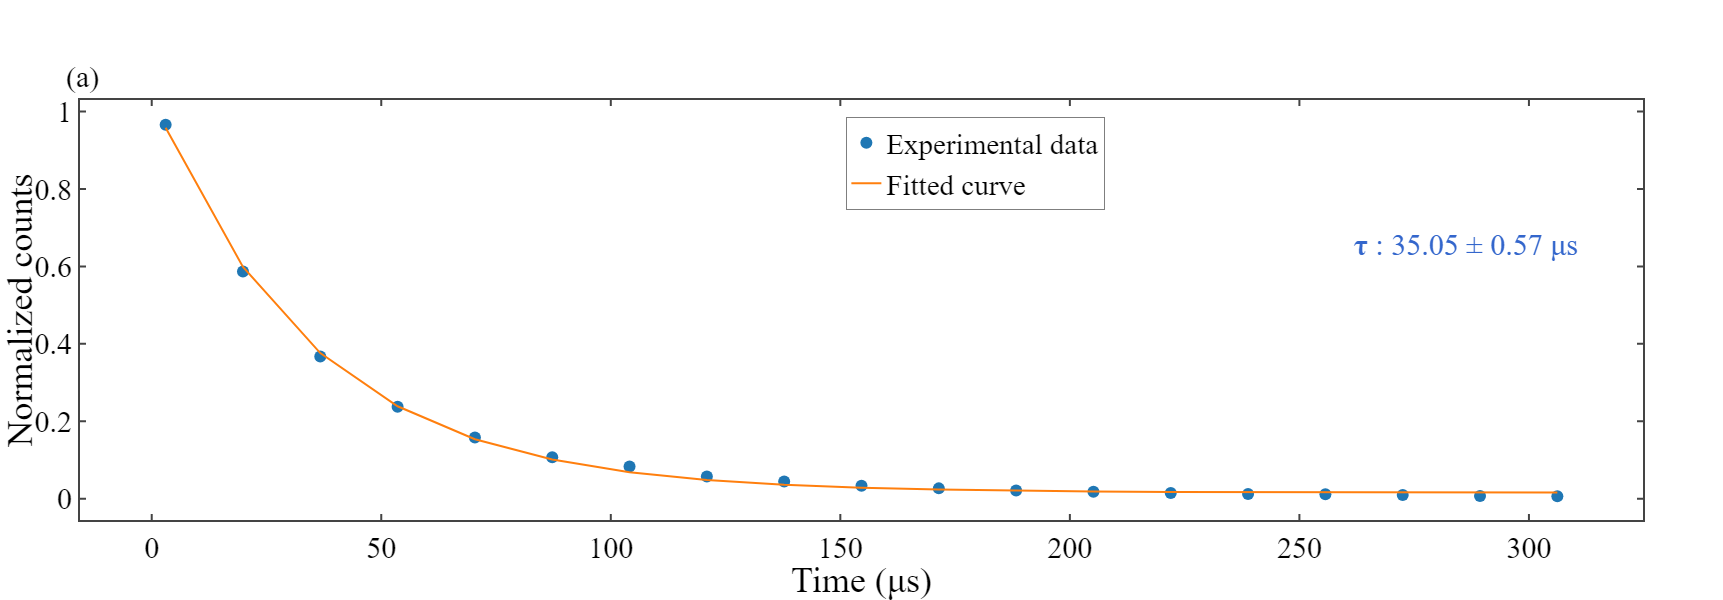

In [154]:
import plotly.express as px

# For Delay Measurement
scale = 1e3

fig = go.Figure()
# fig.add_scatter(x=time_axis[1:]/scale,y=signal_samples[1:],mode='markers',name='signal_counts')
# fig.add_scatter(x=time_axis[1:]/scale,y=reference_samples[1:],mode='markers',name='reference_counts')
fig.add_scatter(x=xOld/scale,y=yOld,mode='markers',name='Experimental data',marker=dict(size=12))
# fig.add_scatter(x=xNew/scale,y=curveFit(xNew,*(coefficient+error_bars)),mode='lines',line=dict(width=0.01),name='plus_one_std')
# fig.add_scatter(x=xNew/scale,y=curveFit(xNew,*(coefficient-error_bars)),mode='lines',line=dict(width=0.01),name='minus_one_std',fill='tonexty',fillcolor='rgb(211, 211, 211)')
fig.add_scatter(x=xNew/scale,y=yNew,mode='lines',line=dict(color="#FF7F0E"),name='Fitted curve')

# fig.add_annotation(
#     xref="x domain", yref="y domain",align = "left", x=1.0, y=0.55,
#     text=f"<b>y<sub>0</sub></b> : {np.round(coefficient[0],3)} &plusmn; {np.round(error_bars[0],3)}\
#     <br><b>y<sub>max</sub></b> : {np.round(coefficient[1],3)} &plusmn; {np.round(error_bars[1],3)}\
#     <br><b>\u03C4</b> : {np.round(coefficient[2]/1e3,3)} &plusmn; {np.round(error_bars[2]/1e3,3)} &mu;s",
#     showarrow=False, font_family="Times New Roman",font_size=30
# )

fig.add_annotation(
    xref="x domain", yref="y domain",align = "left", x=0.96, y=0.7,
    text=f"<br><b>\u03C4</b> : {np.round(coefficient[2]/1e3,2)} &plusmn; {np.round(error_bars[2]/1e3,2)} &mu;s",
    showarrow=False, font_family="Times New Roman",font_size=30,
    font=dict(
            color=px.colors.qualitative.G10[0]
            ),
)

fig.update_layout(template = fig_template,width=700,height=600)
fig.update_xaxes(title_text = "Time (&mu;s)"); fig.update_yaxes(title_text = "Normalized counts",range=[-0.055,1.03])

fig.update_layout(
    legend=dict(
        x=0.49,
        y=0.96,
        title_font_family="Times New Roman",
        font=dict(
            family="Times New Roman",
            size=29,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=0.5
    )
)
fig.update_yaxes(ticksuffix = "")
fig.add_annotation(
    xref="x domain", yref="y domain",align = "left", x=-0.01, y=1.1,
    text=f"(a)",
    showarrow=False, font_family="Times New Roman",font_size=30,
    font=dict(
            color='black'
            ),
)
# fig.write_html(image_total_path)
# if os.stat(image_total_path).st_size == False:
#     raise Exception('Saved image is empty!\n')
# else:
#     print('Saving image is successful')
fig.show() 

In [ ]:
steps=int(input('Enter the no of steps'))
samples=int(input('Enter the no of samples'))

# Separating Reference and Signal and averaging over Samples
reference_samples = np.mean(np.reshape(data[::2],(steps,samples)),axis=1)
signal_samples = np.mean(np.reshape(data[1::2],(steps,samples)),axis=1)
signal_photon = signal_samples/reference_samples

In [ ]:
y_old = signal_photon[1:]
x_old = time_axis[1:]   
guess_params = np.array([0.7,0.9,0.5e6])         # (y0,y_max,tau)
# fit_range = np.array([0,400])*1e3             # provide (x_min,x_max) or 'False'(for all x_range)
fit_range = False

# fitting curve
xOld,yOld,xNew,yNew,coefficient,error_bars = lifetime_fit(x_old,y_old,guess_params,fit_range)

In [ ]:
# def sigmoid(x,x0):
#     return 1/(1+np.exp(-(x-x0)))
# def inverse_sigmoid(x,x0):
#     return 1/(1+np.exp((x-x0)))

In [ ]:
# arr = np.arange(1,10)
# sig = sigmoid(arr,5)
# inv_sig = inverse_sigmoid(arr,5)

# fig = go.Figure()
# fig.add_scatter(x=arr,y=sig,mode='markers' )
# fig.add_scatter(x=arr,y=inv_sig,mode='markers' )
# fig.update_layout(template = fig_template,width=800,height=600)
# fig.show()

In [ ]:
# # For Lifetime Measurement

# x_old=delay1+delay2+read_on+timeRange[:-1] 
# y_old=signal_data
# fig = go.Figure()
# fig.add_scatter(x=x_old,y=y_old,mode='markers',marker=dict(color="royalblue"),name='Experimental Data' )
# fig.update_layout(template = fig_template,width=800,height=600)
# fig.show()

In [ ]:
# y_old = signal_data
# x_old = delay1+delay2+read_on+timeRange[:-1]    # as we are neglecting the last step
# guess_params = np.array([0.3,1,50*1e3])         # (y0,y_max,tau)
# # fit_range = np.array([0,400])*1e3             # provide (x_min,x_max) or 'False'(for all x_range)
# fit_range = False

# # fitting curve
# xOld,yOld,xNew,yNew,coefficient,error_bars = lifetime_fit(x_old,y_old,guess_params,pulse_args,fit_range)

#### Saving files and Plotting

In [ ]:
# directory_name = r"C:\Users\Administrator\OneDrive\Desktop\T1_measurement\Instrument_Automation\Experimental_Applications\T1_Exp_Datas\Delay_Measurements"
# image_directory_name = r"C:\Users\Administrator\OneDrive\Desktop\T1_measurement\Instrument_Automation\Experimental_Applications\T1_Images\Delay_Measurements"
# file_name ='1'

# x_old=delay_timeRange+4*delay_read_on
# y_old=signal_data

# file_name = replace_space(file_name)
# directory_name = replace_space(directory_name)
# contents = np.array([x_old,y_old])
# file_save(directory_name,file_name,contents)                                                                             # saving the data file

In [ ]:
# # Plotting the Fitted Curve
# fig = go.Figure()

# # fig.add_scatter(x=xNew,y=curveFit(xNew,*(coefficient+error_bars)),mode='lines',line=dict(width=0.01),name='plus_one_std')
# # fig.add_scatter(x=xNew,y=curveFit(xNew,*(coefficient-error_bars)),mode='lines',line=dict(width=0.01),name='minus_one_std',fill='tonexty',fillcolor='rgb(211, 211, 211)')
# # fig.add_scatter(x=xNew,y=yNew,mode='lines',line=dict(color="royalblue"),name='Fitted Curve')
# fig.add_scatter(x=x_old,y=y_old,mode='markers',marker=dict(color="royalblue"),name='Experimental Data' )

# fig.update_layout(template = fig_template,width=800,height=600)
# fig.update_xaxes(title_text = "Time (ns)"); fig.update_yaxes(title_text = "Signal_counts")
# # fig.add_annotation(
# #     xref="x domain", yref="y domain",align = "left", x=0.95, y=0.95,
# #     text=f"<b>y<sub>0</sub></b> : {np.round(coefficient[0],3)} &plusmn; {np.round(error_bars[0],3)}\
# #     <br><b>y<sub>max</sub></b> : {np.round(coefficient[1],3)} &plusmn; {np.round(error_bars[1],3)}\
# #     <br><b>\u03C4</b> : {np.round(coefficient[2]/1e3,3)} &plusmn; {np.round(error_bars[2]/1e3,3)} &mu;s",
# #     showarrow=False, font_family="Times New Roman",font_size=20
# # )

# # allowed saving formats : 'html','svg','pdf','png','jpeg','webp'
# image_save(image_directory_name,file_name,fig_to_save=fig,extension='html')
# fig.show()

In [ ]:
# y_old = signal_data
# x_old = delay1+delay2+read_on+timeRange[:-1]    # as we are neglecting the last step
# guess_params = np.array([0.3,1,50*1e3])         # (y0,y_max,tau)
# # fit_range = np.array([0,400])*1e3             # provide (x_min,x_max) or 'False'(for all x_range)
# fit_range = False

# # fitting curve
# xOld,yOld,xNew,yNew,coefficient,error_bars = lifetime_fit(x_old,y_old,guess_params,pulse_args,fit_range)

In [ ]:
# # Saving Data and Images in the mentined folder 
# # Keep 'r' before Directory name or use "C:\\Users\...."
# directory_name = r"C:\Users\Administrator\Desktop\T1_measurement\Instrument_Automation\Experimental_Applications\Exp_Data\year_2024\11May\nanodiamonds\delay_measurements"      # Experimental Data Directory
# # image_directory_name = r"C:\Users\Administrator\Desktop\T1_measurement\Instrument_Automation\Experimental_Applications\Images\year_2024\11May\nanodiamonds\delay_measurements"  # Image Directory
# file_name ='1'

# file_name = replace_space(file_name)
# directory_name = replace_space(directory_name)
# contents = np.array([xOld,yOld])
# file_save(directory_name,file_name,contents)                                                                             # saving the data file

In [ ]:
# # Plotting the Fitted Curve
# fig = go.Figure()

# fig.add_scatter(x=xNew,y=curveFit(xNew,*(coefficient+error_bars)),mode='lines',line=dict(width=0.01),name='plus_one_std')
# fig.add_scatter(x=xNew,y=curveFit(xNew,*(coefficient-error_bars)),mode='lines',line=dict(width=0.01),name='minus_one_std',fill='tonexty',fillcolor='rgb(211, 211, 211)')
# fig.add_scatter(x=xNew,y=yNew,mode='lines',line=dict(color="royalblue"),name='Fitted Curve')
# fig.add_scatter(x=x_old,y=y_old,mode='markers',marker=dict(color="royalblue"),name='Experimental Data' )

# fig.update_layout(template = fig_template,width=800,height=600)
# fig.update_xaxes(title_text = "Time (ns)"); fig.update_yaxes(title_text = "Signal_counts")
# fig.add_annotation(
#     xref="x domain", yref="y domain",align = "left", x=0.95, y=0.95,
#     text=f"<b>y<sub>0</sub></b> : {np.round(coefficient[0],3)} &plusmn; {np.round(error_bars[0],3)}\
#     <br><b>y<sub>max</sub></b> : {np.round(coefficient[1],3)} &plusmn; {np.round(error_bars[1],3)}\
#     <br><b>\u03C4</b> : {np.round(coefficient[2]/1e3,3)} &plusmn; {np.round(error_bars[2]/1e3,3)} &mu;s",
#     showarrow=False, font_family="Times New Roman",font_size=20
# )

# # allowed saving formats : 'html','svg','pdf','png','jpeg','webp'
# image_save(image_directory_name,file_name,fig_to_save=fig,extension='html')
# fig.show()